## Notebook for plotting bar chart for both SL (LGBM/PLSR) & Chemprop models

**Created on 29th January, 2023; modified on 22nd February, 2024; re-remodified on 4th February, 2025**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm ## this is required to render text-editable plots from matplotlib
plt.rc('font', family='arial')
import matplotlib
import seaborn as sns
import os, sys
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from rdkit.Chem import AllChem, DataStructs, PandasTools
from rdkit import Chem

In [2]:
%%bash
pwd
ls -ltr

/Users/riteshk/Library/CloudStorage/Box-Box/Research-postdoc/liquid-electrolyte-ML/Chem-Mater-R1/manuscript-plots
total 28736
-rw-r--r--@ 1 riteshk  staff    52049 Jan 22 15:03 plot_cond_expt_valid_ml_fig5b_012225.eps
-rw-r--r--  1 riteshk  staff      208 Jan 22 15:03 act_energy_expt_valid_ml_fig5b_012225.csv
-rw-------@ 1 riteshk  staff   844288 Jan 29 08:14 emol_expt_measured_022324_.xls
-rw-r--r--@ 1 riteshk  staff    19694 Jan 29 08:16 plot_oxstab_expt-ml-dft_fig_5c_012925.eps
-rw-r--r--@ 1 riteshk  staff    19540 Jan 29 08:20 plot_ce_expt-ml_fig5d_012925.eps
-rw-r--r--@ 1 riteshk  staff   169633 Jan 29 09:26 plot_fig5bcd.ai
-rw-r--r--@ 1 riteshk  staff   819279 Jan 29 09:26 plot_fig5bcd.jpg
-rw-r--r--  1 riteshk  staff     3688 Jan 29 14:50 preds_expt_chemprop_strat_expt_error.csv
-rw-r--r--@ 1 riteshk  staff    20494 Jan 31 14:40 plot_ce_expt-ml_fig5d_013125.eps
-rw-------@ 1 riteshk  staff    53858 Jan 31 14:40 compare-ml-expt_ce_fig5c.ipynb
-rw-r--r--@ 1 riteshk  staff    50709

-rw-r--r--@ 1 riteshk  staff    33869 Feb  2 10:37 plot_tsne_fig1d_zoom.eps
-rw-r--r--@ 1 riteshk  staff  9000206 Feb  2 10:37 plot_tsne_fig1d.tiff
-rw-------@ 1 riteshk  staff   714053 Feb  2 10:37 tsne_plot_fig1d.ipynb
-rw-r--r--@ 1 riteshk  staff     1397 Feb  2 15:09 emol_expt_measured_022324_.csv
-rw-r--r--@ 1 riteshk  staff    19606 Feb  2 15:17 plot_oxstab_expt-ml-dft_fig_5c_020225.eps
-rw-------@ 1 riteshk  staff    47226 Feb  2 15:17 compare-ml-dft-expt_oxstab_fig5c.ipynb
-rw-r--r--@ 1 riteshk  staff    22500 Feb  3 14:37 plot_bar_molecule_distribution_fig1e.eps
-rw-r--r--@ 1 riteshk  staff    57534 Feb  3 14:37 bar_plot_fig1e.ipynb
-rw-r--r--@ 1 riteshk  staff    28445 Feb  5 10:47 plot_bar_ml_perf_comparison_cond_02052025.eps
-rw-r--r--@ 1 riteshk  staff    27138 Feb  5 10:48 plot_bar_ml_perf_comparison_oxstab_02052025.eps
-rw-------@ 1 riteshk  staff    45042 Feb  5 10:48 summary_all_models_oxstab.ipynb
-rw-r--r--@ 1 riteshk  staff    28285 Feb  5 10:49 plot_bar_ml_perf_com

### Property: Ionic conductivity

#### Check performance for Chemprop models

In [34]:
def calc_error(df_true, df_pred):
    y_true = df_true['conductivity_log']
    y_pred = df_pred['conductivity_log']
    return np.sqrt(mean_squared_error(y_true, y_pred)), mean_absolute_error(y_true, y_pred), r2_score(y_true, y_pred)

In [35]:
path = '../conductivity/'
# path_ = '../ionic-conductivity_2.1/'

In [5]:
!ls ../conductivity/

cluster-split-1/  lgbm/             stratified-split/
cluster-split-2/  random-split/


In [36]:
df_true_train_rand = pd.read_csv(path + 'random-split/train_multi_comp_comb_comm.csv')
df_true_val_rand = pd.read_csv(path + 'random-split/val_multi_comp_comb_comm.csv')
df_true_test_rand = pd.read_csv(path + 'random-split/test_multi_comp_comb_comm.csv')
df_pred_train_rand = pd.read_csv(path + 'random-split/deploy/edb/preds_train_rand_comm_s800_e3.csv')
df_pred_val_rand = pd.read_csv(path + 'random-split/deploy/edb/preds_val_rand_comm_s800_e3.csv')
df_pred_test_rand = pd.read_csv(path + 'random-split/deploy/edb/preds_test_rand_comm_s800_e3.csv')

In [37]:
rmse_train_rand, mae_train_rand, r2_train_rand = calc_error(df_true_train_rand, df_pred_train_rand)
rmse_val_rand, mae_val_rand, r2_val_rand = calc_error(df_true_val_rand, df_pred_val_rand)
rmse_test_rand, mae_test_rand, r2_test_rand = calc_error(df_true_test_rand, df_pred_test_rand)

In [38]:
df_true_train_clus1 = pd.read_csv(path + 'cluster-split-1/train_multi_comp_comb_comm.csv')
df_true_val_clus1 = pd.read_csv(path + 'cluster-split-1/val_multi_comp_comb_comm.csv')
df_true_test_clus1 = pd.read_csv(path + 'cluster-split-1/test_multi_comp_comb_comm.csv')
df_pred_train_clus1 = pd.read_csv(path + 'cluster-split-1/deploy/edb/preds_train_clus1_comm_s800_e3.csv')
df_pred_val_clus1 = pd.read_csv(path + 'cluster-split-1/deploy/edb/preds_val_clus1_comm_s800_e3.csv')
df_pred_test_clus1 = pd.read_csv(path + 'cluster-split-1/deploy/edb/preds_test_clus1_comm_s800_e3.csv')

In [39]:
rmse_train_clus1, mae_train_clus1, r2_train_clus1 = calc_error(df_true_train_clus1, df_pred_train_clus1)
rmse_val_clus1, mae_val_clus1, r2_val_clus1 = calc_error(df_true_val_clus1, df_pred_val_clus1)
rmse_test_clus1, mae_test_clus1, r2_test_clus1 = calc_error(df_true_test_clus1, df_pred_test_clus1)

In [40]:
df_true_train_clus2 = pd.read_csv(path + 'cluster-split-2/train_multi_comp_comb_comm.csv')
df_true_val_clus2 = pd.read_csv(path + 'cluster-split-2/val_multi_comp_comb_comm.csv')
df_true_test_clus2 = pd.read_csv(path + 'cluster-split-2/test_multi_comp_comb_comm.csv')
df_pred_train_clus2 = pd.read_csv(path + 'cluster-split-2/deploy/edb/preds_train_clus2_comm_s800_e3.csv')
df_pred_val_clus2 = pd.read_csv(path + 'cluster-split-2/deploy/edb/preds_val_clus2_comm_s800_e3.csv')
df_pred_test_clus2 = pd.read_csv(path + 'cluster-split-2/deploy/edb/preds_test_clus2_comm_s800_e3.csv')

In [41]:
rmse_train_clus2, mae_train_clus2, r2_train_clus2 = calc_error(df_true_train_clus2, df_pred_train_clus2)
rmse_val_clus2, mae_val_clus2, r2_val_clus2 = calc_error(df_true_val_clus2, df_pred_val_clus2)
rmse_test_clus2, mae_test_clus2, r2_test_clus2 = calc_error(df_true_test_clus2, df_pred_test_clus2)

In [42]:
df_true_train_strat2 = pd.read_csv(path + 'stratified-split/train_strat_comm.csv')
df_true_val_strat2 = pd.read_csv(path + 'stratified-split/val_strat_comm.csv')
df_true_test_strat2 = pd.read_csv(path + 'stratified-split/test_strat_comm.csv')
df_pred_train_strat2 = pd.read_csv(path + 'stratified-split/deploy/edb/preds_train_comm_strat2_rd_cdf_s800_e3.csv')
df_pred_val_strat2 = pd.read_csv(path + 'stratified-split/deploy/edb/preds_val_comm_strat2_rd_cdf_s800_e3.csv')
df_pred_test_strat2 = pd.read_csv(path + 'stratified-split/deploy/edb/preds_test_comm_strat2_rd_cdf_s800_e3.csv')

In [43]:
rmse_train_strat2, mae_train_strat2, r2_train_strat2 = calc_error(df_true_train_strat2, df_pred_train_strat2)
rmse_val_strat2, mae_val_strat2, r2_val_strat2 = calc_error(df_true_val_strat2, df_pred_val_strat2)
rmse_test_strat2, mae_test_strat2, r2_test_strat2 = calc_error(df_true_test_strat2, df_pred_test_strat2)

In [44]:
## RMSE list -- final list on 02-28-24
lgbm = [[0.148,0.153,0.142,0.150], [0.206,0.220,0.483,0.370], [0.217,0.186,0.788,0.317]] ## [random, strat, clus-I, clus-II] & [train,val,test]
chem = [[rmse_train_rand, rmse_train_strat2, rmse_train_clus1, rmse_train_clus2], [rmse_val_rand, rmse_val_strat2, rmse_val_clus1, rmse_val_clus2], [rmse_test_rand, rmse_test_strat2, rmse_test_clus1, rmse_test_clus2]] ## [random, strat, clus-I, clus-II] & [train,val,test]

In [45]:
np.array(chem).T[0]
lgm = np.array(lgbm)
chem = np.array(chem)
chem

array([[0.13271232, 0.13723818, 0.2018942 , 0.1593743 ],
       [0.18568601, 0.20156403, 0.52476105, 0.24842563],
       [0.17809691, 0.18392903, 0.99450753, 0.31365768]])

In [17]:
lgbm[0]

[0.148, 0.153, 0.142, 0.15]

In [46]:
mae_train_rand, mae_train_clus1, mae_train_clus2
rmse_test_rand, rmse_test_clus1, rmse_test_clus2, rmse_test_strat2
mae_test_strat2, rmse_test_strat2, r2_test_strat2

(0.08669512896103783, 0.1839290282584005, 0.9392809311641164)

In [25]:
# orange = (0.984, 0.713, 0.305)
# anvil = (0.298, 0.78, 0.77)
# grey = (0.463,0.463,0.463)
blue = (0, 0.576, 0.902) # 0, 147, 230
green = (0.349,0.745,0.306) # 89, 190, 78
red = (0.984, 0.262, 0.219) # 251, 67, 56 
orange = (0.984, 0.713, 0.305) # 251, 182, 78 
purple = (0.839, 0.286, 0.604) # 214, 73, 1541
anvil = (0.298, 0.78, 0.77) # 76, 199, 196
dark_purple = (0.557, 0, 0.998) # 142, 0, 252
pink = (0.95, 0.78, 0.996) # 242, 199, 154
gray = (0.463,0.463,0.463) # 118, 118, 118

In [37]:
matplotlib.use('cairo')
# matplotlib.use('Qt5Agg')
font = fm.FontProperties(family = 'arial')

#### Side-by-side bar plot: on recommendation of reviewer-3 (Chem-Mater-R1)

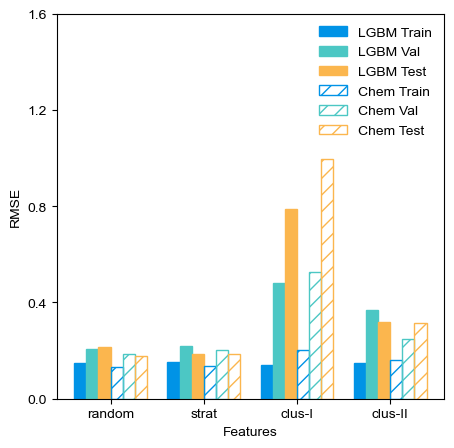

In [36]:
# Create a figure and a set of subplots
fig, ax = plt.subplots(figsize=(5, 5))

# Set the bar width
bar_width = 0.13

# Set the opacity
opacity = 1.0

# Set x positions for each group of bars
x = np.arange(4)

# Plot bars side by side
rects1 = ax.bar(x - bar_width, lgbm[0], bar_width, alpha=opacity, color=blue, edgecolor=blue, label='LGBM Train')
rects1_ = ax.bar(x, lgbm[1], bar_width, alpha=opacity, color=anvil, edgecolor=anvil, label='LGBM Val')
rects__ = ax.bar(x + bar_width, lgbm[2], bar_width, alpha=opacity, color=orange, edgecolor=orange, label='LGBM Test')

# Plot hatched bars
rects2 = ax.bar(x + 2*bar_width, chem[0], bar_width, alpha=opacity, edgecolor=blue, fill=False, hatch='//', label='Chem Train')
rects2_ = ax.bar(x + 3*bar_width, chem[1], bar_width, alpha=opacity, edgecolor=anvil, fill=False, hatch='//', label='Chem Val')
rects2__ = ax.bar(x + 4*bar_width, chem[2], bar_width, alpha=opacity, edgecolor=orange, fill=False, hatch='//', label='Chem Test')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Features')
ax.set_ylabel('RMSE')
ax.set_yticks([0.0, 0.4, 0.8, 1.2, 1.6])
ax.set_yticklabels([0.0, 0.4, 0.8, 1.2, 1.6])
splits = ['random', 'strat', 'clus-I', 'clus-II']
ax.set_xticks(x + 1.5*bar_width)
ax.set_xticklabels(splits)
ax.legend(frameon=False)

# Show the plot
# plt.tight_layout()
plt.savefig('plot_bar_ml_perf_comparison_cond_02052025.eps', dpi=300)

In [39]:
# Create a figure and a set of subplots
fig, ax = plt.subplots(figsize=(5, 5))

# Set the bar width
bar_width = 0.13

# Set the opacity
opacity = 1.0

# Set x positions for each group of bars
x = np.arange(4)

# Plot bars side by side
rects1 = ax.bar(x - bar_width, lgbm[0], bar_width, alpha=opacity, color=blue, edgecolor=blue, label='LGBM Train')
rects1_ = ax.bar(x, lgbm[1], bar_width, alpha=opacity, color=anvil, edgecolor=anvil, label='LGBM Val')
rects__ = ax.bar(x + bar_width, lgbm[2], bar_width, alpha=opacity, color=orange, edgecolor=orange, label='LGBM Test')

# Plot hatched bars
rects2 = ax.bar(x + 2*bar_width, chem[0], bar_width, alpha=opacity, edgecolor=blue, fill=False, hatch='//', label='Chem Train')
rects2_ = ax.bar(x + 3*bar_width, chem[1], bar_width, alpha=opacity, edgecolor=anvil, fill=False, hatch='//', label='Chem Val')
rects2__ = ax.bar(x + 4*bar_width, chem[2], bar_width, alpha=opacity, edgecolor=orange, fill=False, hatch='//', label='Chem Test')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Features')
ax.set_ylabel('RMSE')
ax.set_yticks([0.0, 0.4, 0.8, 1.2, 1.6])
ax.set_yticklabels([0.0, 0.4, 0.8, 1.2, 1.6])
splits = ['random', 'strat', 'clus-I', 'clus-II']
ax.set_xticks(x + 1.5*bar_width)
ax.set_xticklabels(splits)
ax.legend(frameon=False)
plt.savefig('plot_bar_ml_perf_comparison_cond_02052025.pdf', dpi=300)

### Property: Oxidative stability

#### Check performance for Chemprop models

In [47]:
def calc_error(df_true, df_pred):
    y_true = df_true['IE']
    y_pred = df_pred['IE']
    return np.sqrt(mean_squared_error(y_true, y_pred)), mean_absolute_error(y_true, y_pred), r2_score(y_true, y_pred)

In [48]:
path = '../oxstab/'

In [49]:
df_true_train_rand = pd.read_csv(path + 'random-split/train_random.csv')
df_true_val_rand = pd.read_csv(path + 'random-split/val_random.csv')
df_true_test_rand = pd.read_csv(path + 'random-split/test_random.csv')
df_pred_train_rand = pd.read_csv(path + 'random-split/deploy/mp/preds_oxstab_train_rand_rd_e3_s400.csv')
df_pred_val_rand = pd.read_csv(path + 'random-split/deploy/mp/preds_oxstab_val_rand_e3_s400.csv')
df_pred_test_rand = pd.read_csv(path + 'random-split/deploy/mp/preds_oxstab_test_rand_e3_s400.csv')

In [50]:
rmse_train_rand, mae_train_rand, r2_train_rand = calc_error(df_true_train_rand, df_pred_train_rand)
rmse_val_rand, mae_val_rand, r2_val_rand = calc_error(df_true_val_rand, df_pred_val_rand)
rmse_test_rand, mae_test_rand, r2_test_rand = calc_error(df_true_test_rand, df_pred_test_rand)

In [8]:
df_true_train_scaff = pd.read_csv(path + 'scaffold-split/train_scaffold.csv')
df_true_val_scaff = pd.read_csv(path + 'scaffold-split/val_scaffold.csv')
df_true_test_scaff = pd.read_csv(path + 'scaffold-split/test_scaffold.csv')
df_pred_train_scaff = pd.read_csv(path + 'scaffold-split/deploy/mp/preds_oxstab_train_scaff_rd_e3_s400.csv')
df_pred_val_scaff = pd.read_csv(path + 'scaffold-split/deploy/mp/preds_oxstab_val_scaff_e3_s400.csv')
df_pred_test_scaff = pd.read_csv(path + 'scaffold-split/deploy/mp/preds_oxstab_test_scaff_e3_s400.csv')

In [9]:
rmse_train_scaff, mae_train_scaff, r2_train_scaff = calc_error(df_true_train_scaff, df_pred_train_scaff)
rmse_val_scaff, mae_val_scaff, r2_val_scaff = calc_error(df_true_val_scaff, df_pred_val_scaff)
rmse_test_scaff, mae_test_scaff, r2_test_scaff = calc_error(df_true_test_scaff, df_pred_test_scaff)

In [10]:
df_true_train_strat2 = pd.read_csv(path + 'stratified-split/train_strat.csv')
df_true_val_strat2 = pd.read_csv(path + 'stratified-split/val_strat.csv')
df_true_test_strat2 = pd.read_csv(path + 'stratified-split/test_strat.csv')
df_pred_train_strat2 = pd.read_csv(path + 'stratified-split/deploy/mp/preds_train_strat2_e3_s400.csv')
df_pred_val_strat2 = pd.read_csv(path + 'stratified-split/deploy/mp/preds_val_strat2_e3_s400.csv')
df_pred_test_strat2 = pd.read_csv(path + 'stratified-split/deploy/mp/preds_test_strat2_e3_s400.csv')

In [11]:
rmse_train_strat2, mae_train_strat2, r2_train_strat2 = calc_error(df_true_train_strat2, df_pred_train_strat2)
rmse_val_strat2, mae_val_strat2, r2_val_strat2 = calc_error(df_true_val_strat2, df_pred_val_strat2)
rmse_test_strat2, mae_test_strat2, r2_test_strat2 = calc_error(df_true_test_strat2, df_pred_test_strat2)

In [14]:
## RMSE list -- final lgbm list on 02-28-24
lgbm = [[0.260,0.262,0.250], [0.337,0.375,0.798], [0.343,0.356,0.766]] ## [random, strat, scaff] & [train,val,test]
chem = [[rmse_train_rand, rmse_train_strat2, rmse_train_scaff], [rmse_val_rand, rmse_val_strat2, rmse_val_scaff], [rmse_test_rand, rmse_test_strat2, rmse_test_scaff]] ## [random, strat, scaff] & [train,val,test]

In [15]:
lgbm = np.array(lgbm)
chem = np.array(chem)
chem

array([[0.08714401, 0.09680132, 0.08874919],
       [0.19308516, 0.19276747, 0.43631198],
       [0.20288615, 0.23273981, 0.42067502]])

In [51]:
mae_test_rand, rmse_test_rand, r2_test_rand

(0.10841212076264142, 0.20288614817961653, 0.9699053424307936)

#### Side-by-side bar plot: on recommendation of reviewer-3 (Chem-Mater-R1)

In [16]:
blue = (0, 0.576, 0.902) # 0, 147, 230
green = (0.349,0.745,0.306) # 89, 190, 78
red = (0.984, 0.262, 0.219) # 251, 67, 56 
orange = (0.984, 0.713, 0.305) # 251, 182, 78 
purple = (0.839, 0.286, 0.604) # 214, 73, 1541
anvil = (0.298, 0.78, 0.77) # 76, 199, 196
dark_purple = (0.557, 0, 0.998) # 142, 0, 252
pink = (0.95, 0.78, 0.996) # 242, 199, 154
gray = (0.463,0.463,0.463) # 118, 118, 118

In [ ]:
matplotlib.use('cairo')
# matplotlib.use('Qt5Agg')
font = fm.FontProperties(family = 'arial')

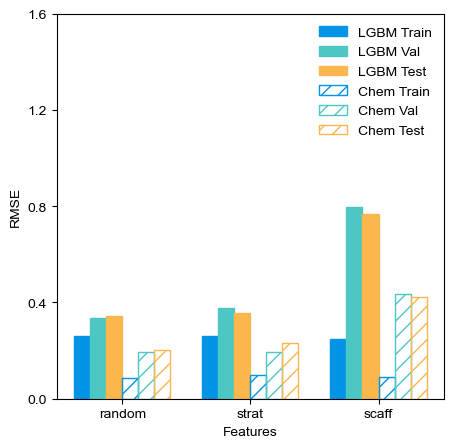

In [17]:
# Create a figure and a set of subplots
fig, ax = plt.subplots(figsize=(5, 5))

# Set the bar width
bar_width = 0.125

# Set the opacity
opacity = 1.0

# Set x positions for each group of bars
x = np.arange(3)

# Plot bars side by side
rects1 = ax.bar(x - bar_width, lgbm[0], bar_width, alpha=opacity, color=blue, edgecolor=blue, label='LGBM Train')
rects1_ = ax.bar(x, lgbm[1], bar_width, alpha=opacity, color=anvil, edgecolor=anvil, label='LGBM Val')
rects__ = ax.bar(x + bar_width, lgbm[2], bar_width, alpha=opacity, color=orange, edgecolor=orange, label='LGBM Test')

# Plot hatched bars
rects2 = ax.bar(x + 2*bar_width, chem[0], bar_width, alpha=opacity, edgecolor=blue, fill=False, hatch='//', label='Chem Train')
rects2_ = ax.bar(x + 3*bar_width, chem[1], bar_width, alpha=opacity, edgecolor=anvil, fill=False, hatch='//', label='Chem Val')
rects2__ = ax.bar(x + 4*bar_width, chem[2], bar_width, alpha=opacity, edgecolor=orange, fill=False, hatch='//', label='Chem Test')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Features')
ax.set_ylabel('RMSE')
ax.set_yticks([0.0, 0.4, 0.8, 1.2, 1.6])
ax.set_yticklabels([0.0, 0.4, 0.8, 1.2, 1.6])
splits = ['random', 'strat', 'scaff']
ax.set_xticks(x + 1.5*bar_width)
ax.set_xticklabels(splits)
ax.legend(frameon=False)

# Show the plot
# plt.tight_layout()
plt.savefig('plot_bar_ml_perf_comparison_oxstab_02052025.eps', dpi=300)

### Property: Coulombic efficiency

#### Check performance for Chemprop models

In [52]:
def calc_error(df_true, df_pred):
    y_true = df_true['log(1-CE)']
    y_pred = df_pred['log(1-CE)']
    return np.sqrt(mean_squared_error(y_true, y_pred)), mean_absolute_error(y_true, y_pred), r2_score(y_true, y_pred)

In [53]:
path = '../CE/chemprop/'

In [54]:
df_true_train_rand = pd.read_csv(path + 'random-split/train_CE_comb_comm.csv') 
df_true_val_rand = pd.read_csv(path + 'random-split/val_CE_comb_comm.csv')
df_true_test_rand = pd.read_csv(path + 'random-split/test_CE_comb_comm.csv')
df_true_ood = pd.read_csv(path + 'random-split/ce_ood_final_comb.csv')
df_pred_train_rand = pd.read_csv(path + 'random-split/deploy/edb/preds_train_rand_e3_comm_s500.csv')
df_pred_val_rand = pd.read_csv(path + 'random-split/deploy/edb/preds_val_rand_e3_comm_s500.csv')
df_pred_test_rand = pd.read_csv(path + 'random-split/deploy/edb/preds_test_rand_e3_comm_s500.csv')
df_pred_ood_rand = pd.read_csv(path + 'random-split/deploy/final-ood/preds_ood_rand_e3_comm_s500.csv')

In [55]:
rmse_train_rand, mae_train_rand, r2_train_rand = calc_error(df_true_train_rand, df_pred_train_rand)
rmse_val_rand, mae_val_rand, r2_val_rand = calc_error(df_true_val_rand, df_pred_val_rand)
rmse_test_rand, mae_test_rand, r2_test_rand = calc_error(df_true_test_rand, df_pred_test_rand)
rmse_ood_rand, mae_ood_rand, r2_ood_rand = calc_error(df_true_ood, df_pred_ood_rand)

In [22]:
print(rmse_test_rand)
print(rmse_ood_rand)
print(mae_ood_rand)

0.4978725886022873
0.3865758450408071
0.2928100620905363


In [57]:
df_true_train_strat2 = pd.read_csv(path + 'stratified-split/strat2_train_comb_comm.csv')
df_true_val_strat2 = pd.read_csv(path + 'stratified-split/strat2_val_comb_comm.csv')
df_true_test_strat2 = pd.read_csv(path + 'stratified-split/strat2_test_comb_comm.csv')
df_pred_train_strat2 = pd.read_csv(path + 'stratified-split/deploy/edb/preds_train_strat2_e3_comm_s500.csv')
df_pred_val_strat2 = pd.read_csv(path + 'stratified-split/deploy/edb/preds_val_strat2_e3_comm_s500.csv')
df_pred_test_strat2 = pd.read_csv(path + 'stratified-split/deploy/edb/preds_test_strat2_e3_comm_s500.csv')
df_pred_ood_strat2 = pd.read_csv(path + 'stratified-split/deploy/final-ood/preds_ood_strat2_e3_comm_s500.csv')

In [58]:
rmse_train_strat2, mae_train_strat2, r2_train_strat2 = calc_error(df_true_train_strat2, df_pred_train_strat2)
rmse_val_strat2, mae_val_strat2, r2_val_strat2 = calc_error(df_true_val_strat2, df_pred_val_strat2)
rmse_test_strat2, mae_test_strat2, r2_test_strat2 = calc_error(df_true_test_strat2, df_pred_test_strat2)
rmse_ood_strat2, mae_ood_strat2, r2_ood_strat2 = calc_error(df_true_ood, df_pred_ood_strat2)

In [25]:
print(rmse_train_strat2)
rmse_val_strat2
print(rmse_test_strat2)
print(rmse_ood_strat2)
print(mae_ood_strat2)

0.45918988796804816
0.5072062867856157
0.3983166233337724
0.2937258372667038


In [59]:
mae_test_strat2, rmse_test_strat2, r2_test_strat2

(0.3820062621391667, 0.5072062867856157, 0.32546917570418343)

In [26]:
df_true_train_clus1 = pd.read_csv(path + 'cluster-split-1/train_CE_comb_comm.csv')
df_true_val_clus1 = pd.read_csv(path + 'cluster-split-1/val_CE_comb_comm.csv') 
df_true_test_clus1 = pd.read_csv(path + 'cluster-split-1/test_CE_comb_comm.csv')
df_pred_train_clus1 = pd.read_csv(path + 'cluster-split-1/deploy/edb/preds_train_clus1_e3_comm_s500.csv')
df_pred_val_clus1 = pd.read_csv(path + 'cluster-split-1/deploy/edb/preds_val_clus1_e3_comm_s500.csv')
df_pred_test_clus1 = pd.read_csv(path + 'cluster-split-1/deploy/edb/preds_test_clus1_e3_comm_s500.csv')

In [27]:
rmse_train_clus1, mae_train_clus1, r2_train_clus1 = calc_error(df_true_train_clus1, df_pred_train_clus1)
rmse_val_clus1, mae_val_clus1, r2_val_clus1 = calc_error(df_true_val_clus1, df_pred_val_clus1)
rmse_test_clus1, mae_test_clus1, r2_test_clus1 = calc_error(df_true_test_clus1, df_pred_test_clus1)

In [28]:
df_true_train_clus2 = pd.read_csv(path + 'cluster-split-2/train_CE_comb_comm.csv')
df_true_val_clus2 = pd.read_csv(path + 'cluster-split-2/val_CE_comb_comm.csv')
df_true_test_clus2 = pd.read_csv(path + 'cluster-split-2/test_CE_comb_comm.csv')    
df_pred_train_clus2 = pd.read_csv(path + 'cluster-split-2/deploy/edb/preds_train_clus2_e3_comm_s500.csv')
df_pred_val_clus2 = pd.read_csv(path + 'cluster-split-2/deploy/edb/preds_val_clus2_e3_comm_s500.csv')
df_pred_test_clus2 = pd.read_csv(path + 'cluster-split-2/deploy/edb/preds_test_clus2_e3_comm_s500.csv')

In [29]:
rmse_train_clus2, mae_train_clus2, r2_train_clus2 = calc_error(df_true_train_clus2, df_pred_train_clus2)
rmse_val_clus2, mae_val_clus2, r2_val_clus2 = calc_error(df_true_val_clus2, df_pred_val_clus2)
rmse_test_clus2, mae_test_clus2, r2_test_clus2 = calc_error(df_true_test_clus2, df_pred_test_clus2)

In [30]:
## RMSE list -- final plsr list on 02-28-24
plsr = [[0.287,0.302,0.246,0.309], [0.513,0.384,0.707,0.823], [0.417,0.411,0.688,1.572]] ## [random, strat, clus-I, clus-II] & [train,val,test]
chem = [[rmse_train_rand, rmse_train_strat2, rmse_train_clus1, rmse_train_clus2], [rmse_val_rand, rmse_val_strat2, rmse_val_clus1, rmse_val_clus2], [rmse_test_rand, rmse_test_strat2, rmse_test_clus1, rmse_test_clus2]] ## [random, strat, clus-I, clus-II] & [train,val,test]

In [31]:
chem = np.array(chem)
plsr = np.array(plsr)
chem

array([[0.47300901, 0.45918989, 0.53089889, 0.41393584],
       [0.46555678, 0.46175239, 0.47451586, 0.66451513],
       [0.49787259, 0.50720629, 0.43851444, 0.45334121]])

#### Side-by-side bar plot: on recommendation of reviewer-3 (Chem-Mater-R1)

In [32]:
blue = (0, 0.576, 0.902) # 0, 147, 230
green = (0.349,0.745,0.306) # 89, 190, 78
red = (0.984, 0.262, 0.219) # 251, 67, 56 
orange = (0.984, 0.713, 0.305) # 251, 182, 78 
purple = (0.839, 0.286, 0.604) # 214, 73, 1541
anvil = (0.298, 0.78, 0.77) # 76, 199, 196
dark_purple = (0.557, 0, 0.998) # 142, 0, 252
pink = (0.95, 0.78, 0.996) # 242, 199, 154
gray = (0.463,0.463,0.463) # 118, 118, 118

In [23]:
matplotlib.use('cairo')
# matplotlib.use('Qt5Agg')
font = fm.FontProperties(family = 'arial')

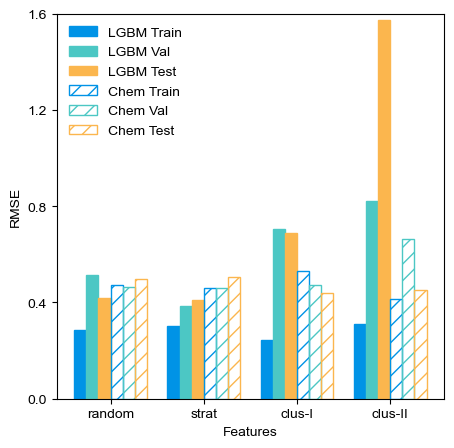

In [33]:
# Create a figure and a set of subplots
fig, ax = plt.subplots(figsize=(5, 5))

# Set the bar width
bar_width = 0.13

# Set the opacity
opacity = 1.0

# Set x positions for each group of bars
x = np.arange(4)

# Plot bars side by side
rects1 = ax.bar(x - bar_width, plsr[0], bar_width, alpha=opacity, color=blue, edgecolor=blue, label='LGBM Train')
rects1_ = ax.bar(x, plsr[1], bar_width, alpha=opacity, color=anvil, edgecolor=anvil, label='LGBM Val')
rects__ = ax.bar(x + bar_width, plsr[2], bar_width, alpha=opacity, color=orange, edgecolor=orange, label='LGBM Test')

# Plot hatched bars
rects2 = ax.bar(x + 2*bar_width, chem[0], bar_width, alpha=opacity, edgecolor=blue, fill=False, hatch='//', label='Chem Train')
rects2_ = ax.bar(x + 3*bar_width, chem[1], bar_width, alpha=opacity, edgecolor=anvil, fill=False, hatch='//', label='Chem Val')
rects2__ = ax.bar(x + 4*bar_width, chem[2], bar_width, alpha=opacity, edgecolor=orange, fill=False, hatch='//', label='Chem Test')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Features')
ax.set_ylabel('RMSE')
ax.set_yticks([0.0, 0.4, 0.8, 1.2, 1.6])
ax.set_yticklabels([0.0, 0.4, 0.8, 1.2, 1.6])
ax.set_ylim(0, 1.6)
splits = ['random', 'strat', 'clus-I', 'clus-II']
ax.set_xticks(x + 1.5*bar_width)
ax.set_xticklabels(splits)
ax.legend(frameon=False)

# Show the plot
# plt.tight_layout()
# plt.savefig('plot_bar_ml_perf_comparison_ce_02052025.eps', dpi=300)